In [145]:
import csv
import math
import operator
import matplotlib.pyplot as plt

In [302]:
def getAllPlayersFromCsv():
    players = []
    counter = 0 
    with open('data.csv', 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if row[1] == 'LeagueIndex':
                continue
            # Adding noise to the MMR since the MMR was unrealistic
            noise = np.random.uniform(-1, 1)
            player = Player("p" + str(counter) + ".", float(row[1]) + noise, float(row[13]))
            players.append(player)
            counter += 1
    return players

In [303]:
class Player:
    def __init__(self, pid, mmr, ping):
        self.pid = pid
        self.mmr = mmr
        self.ping = ping
    
    def getPid(self):
        return self.pid
    
    def getMmr(self):
        return self.mmr
    
    def getPing(self):
        return self.ping
    
    def __str__(self):
        return "Player: " + str(self.pid)
    
    def __repr__(self):
        return "Player: " + str(self.pid)

In [421]:
def euclideanDistance(player1, player2):
    distance = 0
    distance += (player1.getMmr() - player2.getMmr())**2
    distance += (player1.getPing() - player2.getPing())**2
    return math.sqrt(distance)

def getScatterData(players):
    xCoords = []
    yCoords = []
    for player in players:
        xCoords.append(player.getMmr())
        yCoords.append(player.getPing())
        
    return xCoords, yCoords

def plotScatter(queue):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    playersInQueue = queue.getPlayersInQueue()
    xCoords, yCoords = getScatterData(playersInQueue)
    ax.scatter(xCoords, yCoords)
    for i in range(len(playersInQueue)):
        ax.annotate(playersInQueue[i].getPid(), (xCoords[i], yCoords[i]))
    
    return ax

In [422]:
class Queue():
    def __init__(self):
        self.queue = []
        self.distances = {}
        
    def getPlayersInQueue(self):
        return self.queue
    
    def convertPairKeyToPlayers(self, pairKey):
        playerKeys = pairKey.split(".")
        playerKeys = list(filter(None, playerKeys))
        for i in range(len(playerKeys)):
            playerKeys[i] = playerKeys[i] + "."

        players = []
        
        for playerKey in playerKeys:
            for player in self.queue:
                if playerKey == player.getPid():
                    players.append(player)
                    if len(players) == 2:
                        break
        return players
        
    def getHighestPriority(self):
        if (len(self.queue)) > 0:
            return self.queue[0]
        
    def moveHighestPriortyPlayerToLeastPriority(self):
        if len(self.queue) > 0:
            self.queue.append(self.queue.pop(0))
            
    def append(self, newPlayer):
        if (len(self.queue) > 0):
            for i in range(len(self.queue)):
                dist = euclideanDistance(self.queue[i], newPlayer)
                pid1 = self.queue[i].getPid()
                pid2 = newPlayer.getPid()
                key = pid1 + pid2
                self.distances[key] = dist
        self.queue.append(newPlayer)
        
    def removePair(self, pairKey):
        playerKeys = pairKey.split(".")
        playerKeys = list(filter(None, playerKeys))
        for i in range(len(playerKeys)):
            playerKeys[i] = playerKeys[i] + "."
        
        for playerKey in playerKeys:
            for key in list(self.distances.keys()):
                if playerKey in key:
                    del self.distances[key]
        
        for playerKey in playerKeys:
            for player in self.queue[:]:
                if playerKey == player.getPid():
                    self.queue.remove(player)
        
    def getNearestNeighbor(self, player):
        keys = self.distances.keys()
        pid = player.getPid()
        neighbors = {}
        for key in keys:
            if pid in key:
                neighbors[key] = self.distances[key]
        s_neighbors = sorted(neighbors.items(), key=operator.itemgetter(1))
        return (s_neighbors[0])

Successful Match Found!


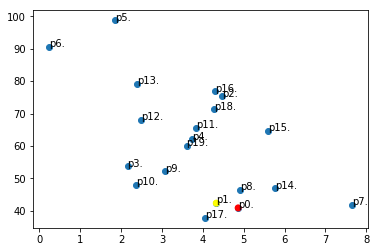

Successful Match Found!


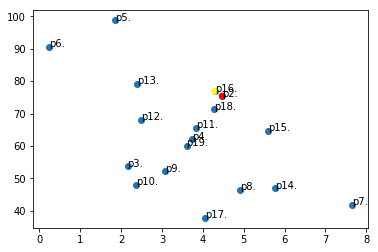

Successful Match Found!


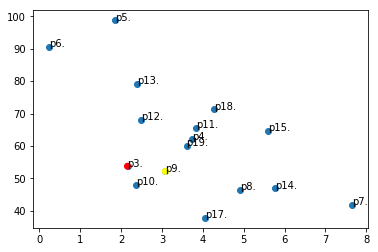

In [437]:
def main():
    MIN_SIMILARITY = 5
    
    # Get all of the test player data
    players = getAllPlayersFromCsv()

    # Create a queue to simulate a game queue
    queue = Queue()
    
    # Add players to the queue
    for i in range(20):
        queue.append(players[i])
            
    # Matchmaking loop
    for i in range(3):
        # Plot the current queue of players
        ax = plotScatter(queue)

        player = queue.getHighestPriority()
        nearestNeighbor = queue.getNearestNeighbor(player)
        if nearestNeighbor[1] < MIN_SIMILARITY:
            print("Successful Match Found!")
            playersToBeRemoved = queue.convertPairKeyToPlayers(nearestNeighbor[0])
            queue.removePair(nearestNeighbor[0])
            xCoordsRemoved, yCoordsRemoved = getScatterData(playersToBeRemoved)
            # Red is the player with highest priority
            # Yellow is the player with the shortest distance
            ax.scatter(xCoordsRemoved, yCoordsRemoved, c=["red", "yellow"])
            plt.show()
        else:
            print("No Match Found!")
            queue.moveHighestPriortyPlayerToLeastPriority()
            plt.show()

main()